# **Teste de Hipótese: Uso do Waze em iPhone vs. Android**

## **Planejamento**

### Informações sobre o conjunto de dados

Este projeto utiliza um conjunto de dados chamado **`waze_dataset.csv`**, composto por **dados sintéticos criados para estudo** em parceria com o Waze. O conjunto conta com **14.999 linhas**, em que cada linha representa um único usuário, e **13 colunas** que armazenam informações diversas relacionadas ao comportamento de uso do aplicativo.

| Nome da Coluna             | Tipo   | Descrição                                                                                                                                       |
|----------------------------|--------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                         | int    | Um índice numérico sequencial                                                                                                                   |
| label                      | obj    | Variável alvo binária (“retenção” vs “cancelamento”) indicando se o usuário cancelou em algum momento durante o mês                           |
| sessions                   | int    | Número de vezes que o usuário abriu o app durante o mês                                                                                         |
| drives                     | int    | Ocorrência de uma direção de pelo menos 1 km durante o mês                                                                                      |
| device                     | obj    | Tipo de dispositivo com o qual o usuário iniciou uma sessão                                                                                     |
| total_sessions             | float  | Estimativa do modelo para o número total de sessões desde que o usuário começou a usar o app                                                   |
| n_days_after_onboarding    | int    | Número de dias desde que o usuário se cadastrou no aplicativo                                                                                   |
| total_navigations_fav1     | int    | Total de navegações desde o cadastro até o local favorito 1 do usuário                                                                          |
| total_navigations_fav2     | int    | Total de navegações desde o cadastro até o local favorito 2 do usuário                                                                          |
| driven_km_drives           | float  | Total de quilômetros dirigidos durante o mês                                                                                                    |
| duration_minutes_drives    | float  | Duração total das viagens em minutos durante o mês                                                                                              |
| activity_days              | int    | Número de dias em que o usuário abriu o app durante o mês                                                                                       |
| driving_days               | int    | Número de dias em que o usuário dirigiu (pelo menos 1 km) durante o mês                                                                         |

### Objetivo  

Usar o Teste de hipótese para analisar a relação entre a quantidade média de viagens e o tipo de dispositivo.

## Etapa 1. Importação

* Importar pacotes
* Carregar conjunto de dados

### 1. Importar pacotes

In [8]:
# ======================================
# Importações de pacotes operacionais padrão
# ======================================
import numpy as np
import pandas as pd

# ======================================
# Importações de pacotes de visualização
# ======================================
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================
# Operações estatísticas e de probabilidade
# ======================================
import scipy.stats as stats

### 2. Carregar conjunto de dados

Leia o conjunto de dados chamado **`waze_dataset.csv`.** 

In [10]:
# Carregar o conjunto de dados em um dataframe
df0 = pd.read_csv(r"D:\#1 Ofice Work\#3 Projeto\#2 Projetos de analise de dados\Teste de Hipótese Uso do Waze\Para GitHub\waze_dataset.csv")

# Exibir as primeiras linhas do dataframe
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


## Etapa 2. Exploração de dados (EDA inicial e limpeza de dados)

- Entendendo as variáveis
- Limpando o conjunto de dados (dados ausentes, dados redundantes, outliers)

### 1. Reunir informações sobre os dados

In [13]:
# Informações básicas
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [14]:
# Estatísticas descritivas para dados numéricos
df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [15]:
# Estatísticas descritivas para dados categóricos
df0.describe(include=['object'])

,label,device
count,14299,14999
unique,2,2
top,retained,iPhone
freq,11763,9672


### 2. Valores ausentes

Verificando se há valores ausentes nos dados.

In [18]:
# Contar valores nulos em cada coluna
null_count_per_column = df0.isnull().sum()

# Contar o total de valores nulos em todo o DataFrame
total_null_count = df0.isnull().sum().sum()

print(null_count_per_column)
print()
print("Total de valores nulos no DataFrame:", total_null_count)

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

Total de valores nulos no DataFrame: 700


<hr style="border: none; border-top: 1px dashed #ccc;">

Vou comparar as estatísticas de resumo das 700 linhas com valores ausentes com as estatísticas de resumo das linhas sem valores ausentes, com o objetivo de identificar se há diferença perceptível entre as duas populações.

In [21]:
# Isolar linhas com valores nulos na coluna 'label'
mascara = df0['label'].isnull()
df_nulos = df0[mascara]

# Exibir estatísticas de resumo das linhas com valores nulos
df_nulos.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [22]:
# Exibir estatísticas de resumo das linhas sem valores nulos
df_sem_nulos = df0[~mascara]

df_sem_nulos.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


>Embora existam algumas diferenças entre as duas populações, elas não parecem ser substancialmente grandes ou sistemáticas o suficiente para indicar uma diferença claramente discernível.

<hr style="border: none; border-top: 1px dashed #ccc;">

Em seguida, verificarei as duas populações com relação à variável do `device`.

In [26]:
# Obter a contagem de valores nulos por dispositivo
df_nulos.value_counts(subset='device', ascending=False)

device
iPhone     447
Android    253
Name: count, dtype: int64

Calcular a porcentagem com cada dispositivo - Android e iPhone. 

In [28]:
# Obter a contagem de valores nulos por dispositivo
contagem = df_nulos.value_counts(subset='device', ascending=False, normalize=True)

# Calcular a porcentagem
porcentagem = contagem * 100

# Formatar como string com símbolo de porcentagem
porcentagem_formatada = porcentagem.apply(lambda x: f'{x:.2f}%')

# Exibir resultados
print(porcentagem_formatada)

device
iPhone     63.86%
Android    36.14%
Name: proportion, dtype: object


In [29]:
# Obter a contagem de valores por dispositivo
contagem = df0.value_counts(subset='device', ascending=False)

# Calcular o total de valores
total = contagem.sum()

# Calcular a porcentagem
porcentagem = (contagem / total * 100).round(2)

# Formatar como string com símbolo de porcentagem
porcentagem_formatada = porcentagem.apply(lambda x: f'{x:.2f}%')

# Exibir resultados
print(porcentagem_formatada)

device
iPhone     64.48%
Android    35.52%
Name: count, dtype: object


<hr style="border: none; border-top: 1px dashed #ccc;">

#### Observações:

- A coluna `label` (que indica retenção/rotatividade) tem 700 valores ausentes (14999 - 14299), porém esta coluna não será diretamente usada *neste* teste de hipótese específico (iPhone vs Android).

- As colunas `drives` e `device`, que são as chaves para o objetivo da análise, **não possuem valores ausentes** (14999 non-null).

- A porcentagem de valores ausentes é consistente com sua representação nos dados em geral. Não há nada que sugira uma causa não aleatória para os dados ausentes.

### 3. Verificar duplicatas

Verificando se há entradas duplicadas nos dados.

In [35]:
# Checando por duplicatas
colunas_avaliacao = ['label', 'sessions', 'drives', 'device', 'total_sessions',
                     'n_days_after_onboarding', 'total_navigations_fav1', 
                     'total_navigations_fav2', 'driven_km_drives', 
                     'duration_minutes_drives', 'activity_days', 'driving_days']

duplicates = df0[df0.duplicated(subset=colunas_avaliacao, keep=False)]

print(f"Número de linhas com dados duplicados: {len(duplicates)}")

Número de linhas com dados duplicados: 0


### 4. Verificar outliers

Verificando se há valores discrepantes nos dados.

In [38]:
percentile25 = df0['drives'].quantile(0.25)
percentile75 = df0['drives'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(f"Estatísticas para detecção de outliers na coluna 'drives':")
print(f"Percentil 25%: {percentile25:.2f}")
print(f"Percentil 75%: {percentile75:.2f}")
print(f"IQR (Intervalo Interquartil): {iqr:.2f}")
print(f"Limite inferior: {lower_limit:.2f}")
print(f"Limite superior: {upper_limit:.2f}")
print(f"Valores abaixo do limite inferior: {sum(df0['drives'] < lower_limit)}")
print(f"Valores acima do limite superior: {sum(df0['drives'] > upper_limit)}")
print(f"Percentual de outliers: {((sum(df0['drives'] < lower_limit) + sum(df0['drives'] > upper_limit)) / len(df0) * 100):.2f}%")


Estatísticas para detecção de outliers na coluna 'drives':
Percentil 25%: 20.00
Percentil 75%: 93.00
IQR (Intervalo Interquartil): 73.00
Limite inferior: -89.50
Limite superior: 202.50
Valores abaixo do limite inferior: 0
Valores acima do limite superior: 734
Percentual de outliers: 4.89%


In [39]:
# Função auxiliar para plotar histogramas 
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = quaisquer argumentos de palavra-chave
                                                            # da função sns.histplot()
   median=round(df0[column_str].median(), 1)
   plt.figure(figsize=(5,3))
   ax = sns.histplot(x=df0[column_str], **kwargs)            # Plota o histograma
   plt.axvline(median, color='red', linestyle='--')         # Plota a linha da mediana
   if median_text==True:                                    # Adiciona texto da mediana a menos que seja False
       ax.text(0.25, 0.85, f'mediana={median}', color='red',
           ha='left', va='top', transform=ax.transAxes)
   else:
       print('Mediana:', median)
   plt.title(f'Histograma de {column_str}');

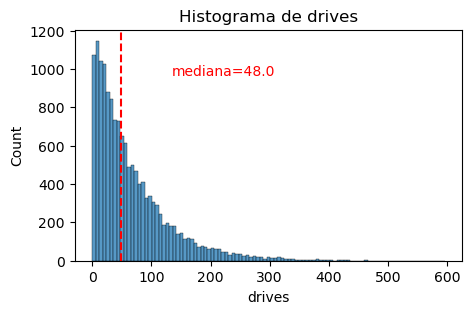

In [40]:
# Histogram
histogrammer('drives')

>O gráfico é inclinado para a direita, aproximadamente log-normal, com uma mediana de 48. No entanto, alguns motoristas tiveram mais de 400 viagens no último mês.

<hr style="border: none; border-top: 1px dashed #ccc;">

Distribuição da variável do `device`.

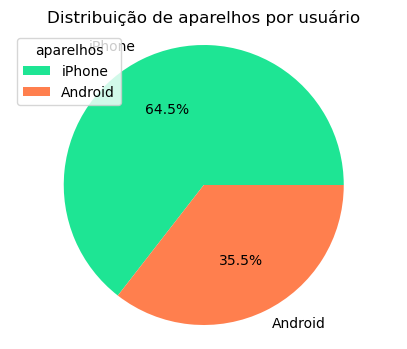

In [44]:
# Pie chart
device_counts = df0['device'].value_counts()

# Definindo cores personalizadas para as fatias
colors = ['#1ee594', '#ff7f4e'] 

# Agora, vamos criar o gráfico de pizza
plt.figure(figsize=(5,4))
plt.pie(device_counts, 
       labels=device_counts.index,
       autopct='%1.1f%%',
       colors=colors)

# Adicionando título e legenda
plt.title('Distribuição de aparelhos por usuário')
plt.axis('equal')  # Para deixar o gráfico circular
plt.legend(title='aparelhos', loc='upper left')


>Há quase duas vezes mais usuários de iPhone do que usuários de Android representados nesses dados.

<hr style="border: none; border-top: 1px dashed #ccc;">

Os gráficos a seguir permitirão visualizar se a assimetria e a variabilidade se mantêm em ambos os grupos e dar uma ideia visual com uma representação visual.

Text(48.1, 15.855, '48.00')

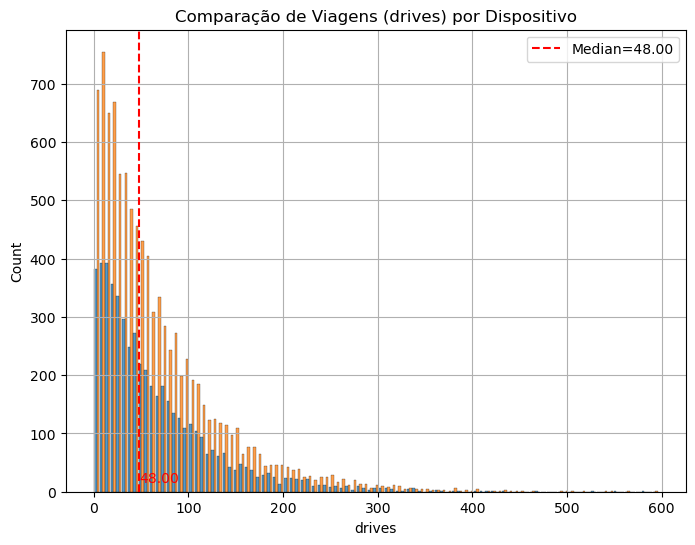

In [48]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df0,
             x='drives',
             hue='device',
             multiple='dodge',
             shrink=0.9)
plt.title('Comparação de Viagens (drives) por Dispositivo');
plt.grid(True)

# Calcular e marcar a mediana
median = df0['drives'].median()
plt.axvline(median, color='red', linestyle='--', label=f'Median={median:.2f}')
plt.legend() 
plt.text(median + 0.1, plt.gca().get_ylim()[1]*0.02, f'{median:.2f}', color='red', fontsize=10)

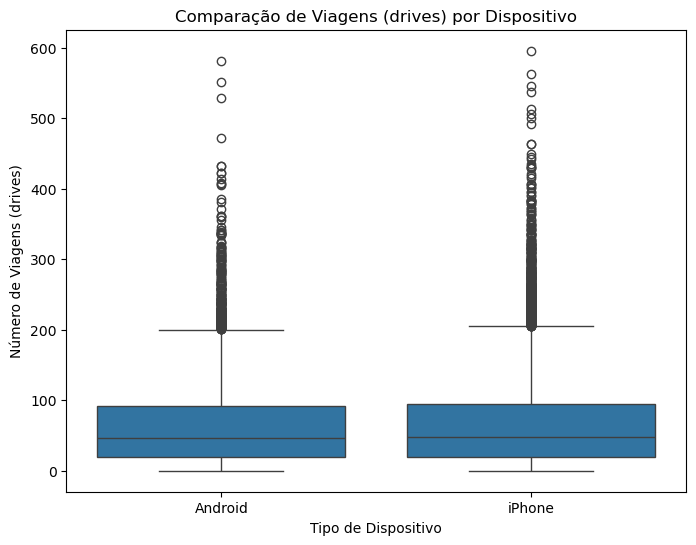

In [49]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df0, x='device', y='drives')
plt.title('Comparação de Viagens (drives) por Dispositivo')
plt.xlabel('Tipo de Dispositivo')
plt.ylabel('Número de Viagens (drives)')
plt.show()

- Medianas (linha dentro da caixa) **quase idênticas**.
- IQRs (altura da caixa) **muito similares**.
- Extensão geral dos dados (whiskers) **semelhante**.
- Presença de **muitos outliers superiores** em ambos os grupos, confirmando a assimetria.

<hr style="border: none; border-top: 1px dashed #ccc;">

In [52]:
# Calculando média e mediana dos drives agrupados por dispositivo
stats_por_dispositivo = df0.groupby('device')['drives'].agg(['mean', 'median']).round(2)

# Renomeando as colunas para melhor compreensão
stats_por_dispositivo.columns = ['Média', 'Mediana']

# Visualização
print("\n=== Estatísticas de Drives por Dispositivo ===")
print(stats_por_dispositivo.to_string())


=== Estatísticas de Drives por Dispositivo ===
         Média  Mediana
device                 
Android  66.23     47.0
iPhone   67.86     48.0


<hr style="border: none; border-top: 1px dashed #ccc;">

#### Observações:

- A distribuição do número de viagens (drives) por dispositivo apresenta-se fortemente assimétrica (inclinado para a direita), o que é típico de dados que podem ser aproximados por uma distribuição log-normal. Essa assimetria fica clara pela presença de uma grande concentração de valores baixos e, ao mesmo tempo, alguns valores bastante elevados (acima de 400 viagens no mês) que acabam estendendo a cauda do histograma, por exemplo.

- A mediana de 48 indica que mais da metade dos motoristas realiza até 48 viagens no período analisado, enquanto uma parcela relativamente pequena faz um número muito maior de viagens. Em situações como essa, a mediana costuma ser um indicador mais representativo do “valor central” do que a média, pois a presença de outliers ou valores extremos pode distorcer a média de forma significativa.

- A sobreposição das barras por dispositivo (usando `hue='device'`) no histograma permite comparar, de maneira visual, como os diferentes dispositivos se distribuem em relação à quantidade de viagens. As distribuições apresentam grandes similaridades (por exemplo, picos semelhantes e caudas com extensão análoga), podemos inferir que os comportamentos de uso entre os dispositivos são parecidos.

- O Box Plot comparativo sugere visualmente que *não* há uma diferença prática significativa nas distribuições centrais de `drives` entre os dois dispositivos.

- Os valores estatísticos apresentados indicam que os dados de "drives" estão bastante equilibrados entre os dispositivos Android e iPhone. A média para o Android é 66,23 e para o iPhone é 67,86, enquanto as medianas são 47,0 e 48,0, respectivamente. Essa semelhança nos indicadores de tendência central sugere que, em termos de quantidade de viagens realizadas, o comportamento dos motoristas não difere substancialmente entre os grupos.

---

# **Analise**

## Etapa 3. Teste de hipótese

O objetivo é realizar um teste t de duas amostras:

- Declarar a hipótese nula e a hipótese alternativa
- Escolher um nível de significância
- Encontrar o valor p
- Rejeitar ou não rejeitar a hipótese nula

### 1. Hipóteses para esse projeto de dados:

- $H_0$: Não há diferença estatisticamente significativa entre a média de viagens (`drives`) de usuários de iPhone e a **média de viagens (`drives`)** de usuários de Android.

- $H_A$: Existe uma diferença estatisticamente significativa entre a média de viagens (`drives`) de usuários de iPhone e a **média de viagens (`drives`)** de usuários de Android.

### 2. Nível de significância:

Estabeleci o nível de significância em **α = 0.05**, o que corresponde a uma probabilidade de **5%** de cometer um erro do Tipo I (rejeitar a hipótese nula quando ela é verdadeira).

### 3. p-value:

In [92]:
# 1. Isolar a coluna `drives` para os usuários do iPhone.
df_iPhone = df0[df0['device'] == 'iPhone']

# 2. Isolar a coluna `drives` para os usuários do Android.
df_Android = df0[df0['device'] == 'Android']

# 3. Realizar o teste t
stats.ttest_ind(a=df_iPhone['drives'], b=df_Android['drives'], equal_var=False)

TtestResult(statistic=1.463523206885235, pvalue=0.143351972680206, df=11345.066049381952)

> **Estatística t (`statistic`):** ~1.46. Este valor indica a diferença entre as médias dos grupos em termos de erro padrão.
 
> **Valor-p (`pvalue`):** ~0.1434. Como o valor-p é **maior** que o nível de significância, **a hipótese nula não pode ser rejeitada. ($H_0$)**.

> **Graus de Liberdade (`df`):** ~11345. Calculado pela aproximação de Welch-Satterthwaite, um método apropriado para estimar os graus de liberdade quando as variâncias dos dois grupos podem ser diferentes.

### 4. Interpretação dos Resultados:

*   Comparação do valor-p com α: `0.1434 ≥ 0.05`.
 
Com base neste teste, **não há evidência estatística suficiente** (ao nível de significância de 5%) para concluir que existe uma diferença real na média de viagens (`drives`) entre usuários de iPhone e usuários de Android no conjunto de dados.

A pequena diferença nas médias observadas na análise exploratória (iPhone: 67.86, Android: 66.23) não é estatisticamente significativa; é provável que ela tenha ocorrido devido à variabilidade amostral aleatória.

## Conclusão

1. O que foi observado sobre as distribuições nos dados?

    *   A análise exploratória revelou que a distribuição do número de viagens mensais (`drives`) por usuário é **fortemente assimétrica à direita**. Isso significa que a maioria dos usuários realiza um número relativamente baixo de viagens, enquanto uma minoria de usuários ("power users") realiza um número muito alto de viagens, criando uma longa cauda nos histogramas. Consequentemente, a **média de viagens (aprox. 67) é consideravelmente maior que a mediana (48)**, sendo a mediana um indicador mais robusto do comportamento central neste caso. A análise de outliers pelo método IQR também confirmou a presença de um percentual significativo (aprox. 5%) de valores considerados altos.

    *   Ao comparar as distribuições de `drives` entre usuários de **iPhone** e **Android**, observou-se uma **notável similaridade**. Tanto os histogramas quanto os box plots mostraram formas de distribuição, tendências centrais (medianas quase idênticas: 48 para iPhone, 47 para Android) e dispersão (intervalos interquartis e variabilidade geral) muito parecidas entre os dois grupos.

2. Que insight(s) comercial(is) pode ser extraído do resultado do teste de hipótese?

    *   Do ponto de vista de negócios, este resultado sugere que, no que diz respeito à frequência média de uso (medida por `drives`), os usuários de ambas as plataformas se comportam de maneira similar. Portanto, estratégias focadas em aumentar o número de viagens ou o engajamento geral podem, a princípio, ser aplicadas uniformemente entre os dois grupos de dispositivos, sem necessidade de segmentação específica por plataforma *para esta métrica*.

    *   A ausência de diferença significativa aqui sugere que outros fatores (não analisados neste escopo, como tempo de uso do app, ou uso de funcionalidades específicas) podem ser mais relevantes para explicar variações no comportamento ou na retenção dos usuários. Investigações futuras poderiam explorar essas outras variáveis.